In [5]:
import json
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap

Text(0, 0.5, '$n_p$')

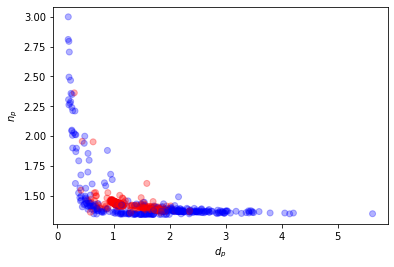

In [6]:
df = pd.read_csv('data/cfc2020_10_01run002.csv', header = 12)
df = df.rename(columns = {"d [μm]":"d_p", 'd uncertainty [μm]':'dd_p',
                          'n':'n_p', 'n uncertainty': 'dn_p',
                         'z [μm]': "z_p"}) 

df.symmetry = df.symmetry.replace({'Spherical': 0, 'Non-spherical': 1})

colors = [(1, 0, 0), (0, 0, 1)] 
cm = LinearSegmentedColormap.from_list(
        'twocolor', colors, N=2)
plt.scatter(df.d_p, df.n_p, alpha=0.3, c=df.symmetry, cmap=cm)
plt.xlabel(r'$d_p$')
plt.ylabel(r'$n_p$')

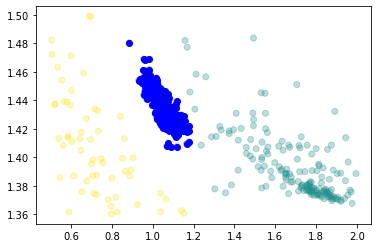

In [7]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
dfcrop = df[df.d_p < 2]
dfcrop = dfcrop[dfcrop.d_p > 0.5]
dfcrop = dfcrop[dfcrop.n_p > 1.36]
dfcrop = dfcrop[dfcrop.n_p < 1.5]

chardata = np.array([dfcrop.d_p, dfcrop.n_p]).T

gmm.fit(chardata)

clusters = [dfcrop[gmm.predict(chardata) == i] for i in np.arange(2)]
which_mono = np.argmin([x.std().d_p for x in clusters])

monomer = clusters[which_mono]

which_agg = np.argmax([x.std().d_p for x in clusters])
aggreg = clusters[which_agg]
plt.scatter(dfcrop.d_p, dfcrop.n_p, c=gmm.predict(chardata), alpha=0.3)

plt.scatter(monomer.d_p, monomer.n_p, c='b')

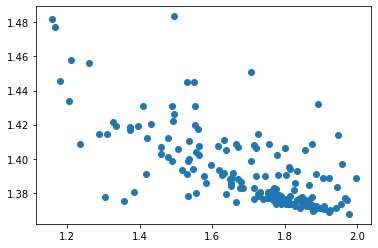

In [8]:
dimers = dfcrop[gmm.predict(chardata) == 1]
monomers = dfcrop[gmm.predict(chardata) == 2]
extra = dfcrop[gmm.predict(chardata) == 0]

def label(x):
    if x == 0:
        return 'extra'
    elif x == 1:
        return 'dimer'
    elif x == 2:
        return 'monomer'

labels = [label(x) for x in gmm.predict(chardata)]
dfcrop['label'] = labels


plt.scatter(dimers.d_p, dimers.n_p)
dfcrop.to_csv('data/cheong_separated02.csv')